In [8]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import gzip
import os
import tempfile

import numpy
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

In [2]:
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
sess = tf.InteractiveSession()

In [4]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [5]:
x = tf.placeholder("float", shape=[None, 784])
y_ = tf.placeholder("float", shape=[None, 10])


W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)




In [36]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess.run(tf.global_variables_initializer())

for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy) )
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print( "test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.08
step 100, training accuracy 0.86
step 200, training accuracy 0.82
step 300, training accuracy 0.9
step 400, training accuracy 0.96
step 500, training accuracy 0.96
step 600, training accuracy 0.96
step 700, training accuracy 0.98
step 800, training accuracy 0.96
step 900, training accuracy 0.92
step 1000, training accuracy 0.94
step 1100, training accuracy 0.94
step 1200, training accuracy 0.96
step 1300, training accuracy 0.98
step 1400, training accuracy 0.96
step 1500, training accuracy 0.98
step 1600, training accuracy 0.94
step 1700, training accuracy 0.96
step 1800, training accuracy 0.94
step 1900, training accuracy 1
step 2000, training accuracy 0.96
step 2100, training accuracy 0.94
step 2200, training accuracy 0.94
step 2300, training accuracy 0.98
step 2400, training accuracy 0.98
step 2500, training accuracy 0.98
step 2600, training accuracy 0.98
step 2700, training accuracy 0.98
step 2800, training accuracy 0.98
step 2900, training accuracy 0

In [22]:
import numpy as np

In [54]:
np.argmax(y_conv.eval(feed_dict={x:batch[0],keep_prob: 1.0}),axis=1)

array([3, 9, 3, 4, 6, 1, 2, 8, 4, 2, 3, 7, 1, 6, 3, 3, 5, 9, 4, 6, 1, 1, 7,
       8, 6, 2, 2, 9, 2, 9, 7, 7, 1, 1, 9, 9, 1, 0, 6, 4, 6, 2, 0, 1, 0, 8,
       9, 9, 7, 7], dtype=int64)

In [27]:
vatch = mnist.train.next_batch(50)

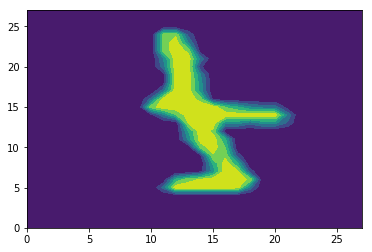

In [58]:
plt.contourf(batch[0][49].reshape([28,28]))
plt.show()

TypeError: tuple indices must be integers or slices, not tuple